## Predicting Customer Interest in Vehicle Insurance

## 1.0 Business Understanding

Cross-selling in insurance presents significant opportunities for insurance companies to drive revenue growth, increase customer retention, and deliver added value to their customers. It involves offering the customer the chance to purchase other products that relate to or enhance the insurance already in place. From the insurer's point of view, it is an opportunity to provide more value to the customer and thus create a more lasting and profitable relationship. The concept of cross-selling is based on the understanding that customers who have already purchased one type of insurance are more likely to be interested in purchasing other insurance products. By understanding customer needs and preferences and implementing targeted cross-selling strategies, insurers can maximize the potential of their existing customer base while providing comprehensive insurance solutions tailored to individual needs.


### 1.1 Problem Statement

Cross-selling presents significant challenges for insurance companies like identifying the right cross-selling opportunities within the existing customer base, lack of personalization, integration with sales processes and measuring success. This project aims to develop a machine learning model that can accurately predict whether the life insurance policyholders (customers) of ICEA LION Group from the past year will also be interested in Vehicle Insurance provided by the General Insurance company.

### 1.2 Objectives

1. Identify factors that influence life insurance policy holders interest in motor vehicle insurance.

2. Evaluate performance of different machine learning models in insurance cross-selling by comparing accuracy metrics.

3. Identify machine learning model that shows superior performance in predicting the likelihood of a customer accepting an offer for vehicle insurance.


### 1.3 Research Questions

1. What factors influence a life insurance policyholder's interest in purchasing vehicle insurance?

2. How do different machine learning models perform in cross-selling insurance and how do their accuracy metrics compare?

3. Which machine learning model is the most effective in predicting the likelihood of a customer accepting an offer for vehicle insurance?


### 1.4 Business Goal

Building a model to predict whether a customer would be interested in Vehicle Insurance will be extremely helpful for the company because it will then accordingly plan its communication strategy to reach out to those customers and optimize its business model and revenue.


## 2.0 Data Understanding

The dataset was sourced from ICEA LION Group. Datasets provided for the analysis include:
    
• train_data_cross-sell.csv: This dataset contains the target variable "Response" and will be utilized for training the model.

• test_data_cross-sell.csv: This dataset resembles the training dataset but does not include the target-related variable.

The dataset contains features that are clearly described and include the following features:
    
• id: Unique ID for the customer
    
• Gender: Gender of the customer
    
• Customer_Date_of_Birth: Customer Date of Birth
    
• Driving_License:
    
 0 : Customer does not have DL
 1 : Customer already has DL
    
• Customer_Residence_Sub_County: Customer Residence Sub County
    
• Previously_Insured:
    
 1 : Customer already has Vehicle Insurance,
 0 : Customer doesn't have Vehicle Insurance
    
• Vehicle_Year_of_Manufacture: Vehicle Year of Manufacture
    
• Vehicle_Damage:
    
 1 : Customer got his/her vehicle damaged in the past.
 0 : Customer didn't get his/her vehicle damaged in the past.
    
• Annual_Premium: The amount customer needs to pay as premium in the year
    
• Agent_name: Name of the life insurance sales agent who sold to the customer
    
• Life_policy_start_date: The effective date of the customers life insurance policy
    
• Response:
 1 : Customer is interested,
 0 : Customer is not interested


### 2.1 Import Libraries and Loading of Data

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score, confusion_matrix, f1_score
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import roc_curve, roc_auc_score, log_loss
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier


In [35]:
# Loading the csv files
df_train = pd.read_csv("train_data_cross-sell.csv")

#observe the first five entries of training dataset
df_train.head()

,id,Gender,Customer_Date_of_Birth,Driving_License,Customer_Residence_Sub_County,Previously_Insured,Vehicle_Year_of_Manufacture,Vehicle_Damage,Annual_Premium,Agent_name,Life_policy_start_date,Response
0,549771831,Male,"Monday, March 7, 1977",1,EMBAKASI,0,2020,Yes,38294,Jomo Kenyatta,"Thursday, December 21, 2023",1
1,373583351,Male,"Sunday, December 29, 2002",1,WESTLANDS,1,2020,No,28619,Obiero Ochieng,"Wednesday, June 28, 2023",0
2,933163655,Female,"Tuesday, August 23, 1994",1,DAGORETTI,1,2011,No,27496,Obiero Ochieng,"Saturday, December 9, 2023",0
3,698942186,Female,"Thursday, November 18, 1999",1,JUJA,0,2020,Yes,2630,Gitonga Mwangi,"Tuesday, July 25, 2023",0
4,515109822,Male,"Thursday, February 22, 2001",1,WESTLANDS,0,2015,Yes,23367,Obiero Ochieng,"Saturday, May 13, 2023",0


## 3.0 Exploratory Data Analysis

### 3.1 Understanding training dataframe structure

In [36]:
# Check data shape
df_train.shape

(324466, 12)

In [38]:
#check the data types of each column
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324466 entries, 0 to 324465
Data columns (total 12 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   id                             324466 non-null  int64 
 1   Gender                         324466 non-null  object
 2   Customer_Date_of_Birth         324466 non-null  object
 3   Driving_License                324466 non-null  int64 
 4   Customer_Residence_Sub_County  324466 non-null  object
 5   Previously_Insured             324466 non-null  int64 
 6   Vehicle_Year_of_Manufacture    324466 non-null  int64 
 7   Vehicle_Damage                 324466 non-null  object
 8   Annual_Premium                 324466 non-null  int64 
 9   Agent_name                     324466 non-null  object
 10  Life_policy_start_date         324466 non-null  object
 11  Response                       324466 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 29.7+ M

In [20]:
#check missing values
df_train.isnull().sum()

id                               0
Gender                           0
Customer_Date_of_Birth           0
Driving_License                  0
Customer_Residence_Sub_County    0
Previously_Insured               0
Vehicle_Year_of_Manufacture      0
Vehicle_Damage                   0
Annual_Premium                   0
Agent_name                       0
Life_policy_start_date           0
Response                         0
Rand                             0
dtype: int64

In [40]:
df_train.nunique()

id                               324396
Gender                                2
Customer_Date_of_Birth            21108
Driving_License                       2
Customer_Residence_Sub_County        53
Previously_Insured                    2
Vehicle_Year_of_Manufacture          14
Vehicle_Damage                        2
Annual_Premium                    47027
Agent_name                          155
Life_policy_start_date              290
Response                              2
dtype: int64

In [4]:
#Checking for Duplicates
df_train.duplicated().sum()

0

Our dataset has no duplicated row values

In [42]:
#summary of descriptive statistics for numerical columns
df_train.describe(include=[np.number])

,id,Driving_License,Previously_Insured,Vehicle_Year_of_Manufacture,Annual_Premium,Response
count,3.244660e+05,324466.000000,324466.000000,324466.000000,324466.000000,324466.000000
mean,5.751385e+08,0.997938,0.457971,2015.048584,30570.897339,0.122805
std,2.457573e+08,0.045361,0.498231,3.745267,17196.763434,0.328214
min,1.500074e+08,0.000000,0.000000,2009.000000,2630.000000,0.000000
25%,3.622662e+08,1.000000,0.000000,2012.000000,24404.000000,0.000000
50%,5.752094e+08,1.000000,0.000000,2015.000000,31661.000000,0.000000
75%,7.881495e+08,1.000000,1.000000,2018.000000,39393.000000,0.000000
max,9.999996e+08,1.000000,1.000000,2022.000000,540165.000000,1.000000


### 3.2 Data Preparation

In [37]:
# Drop the 'id' column from the DataFrame
df_train.drop(['id'], axis=1, inplace=True)
df_train.head()

,Gender,Customer_Date_of_Birth,Driving_License,Customer_Residence_Sub_County,Previously_Insured,Vehicle_Year_of_Manufacture,Vehicle_Damage,Annual_Premium,Agent_name,Life_policy_start_date,Response
0,Male,"Monday, March 7, 1977",1,EMBAKASI,0,2020,Yes,38294,Jomo Kenyatta,"Thursday, December 21, 2023",1
1,Male,"Sunday, December 29, 2002",1,WESTLANDS,1,2020,No,28619,Obiero Ochieng,"Wednesday, June 28, 2023",0
2,Female,"Tuesday, August 23, 1994",1,DAGORETTI,1,2011,No,27496,Obiero Ochieng,"Saturday, December 9, 2023",0
3,Female,"Thursday, November 18, 1999",1,JUJA,0,2020,Yes,2630,Gitonga Mwangi,"Tuesday, July 25, 2023",0
4,Male,"Thursday, February 22, 2001",1,WESTLANDS,0,2015,Yes,23367,Obiero Ochieng,"Saturday, May 13, 2023",0


From our train dataset we will drop the 'id' column as it is a unique identifier for each customer therefore not relevant for analysis.

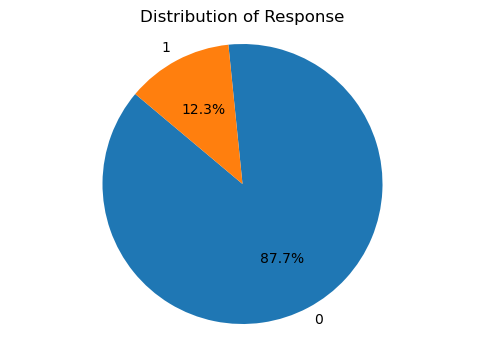

In [44]:
#Visualize our target variable- customer 'Response'

response_counts = df_train['Response'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(6, 4))
plt.pie(response_counts, labels=response_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Response')
plt.axis('equal')
plt.show()

The pie chart above shows the distribution of existing life insurance customers' willingness to acquire motor vehicle insurance, categorized as willing(1) and unwilling (0). The percentages are displayed, with 12.3% of customers expressing willingness to add motor vehicle insurance. On the other hand, the majority, which accounts for 87.7% of life insurance customers, are reluctant to obtain motor vehicle insurance. This indicates a significant class imbalance within the dataset, which could potentially result in complications during model development, such as model bias.

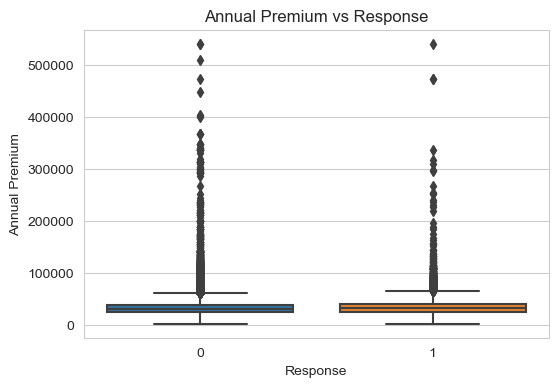

In [45]:
# visualize the distribution of 'Annual_Premium' for each category of the 'Response' variable.
sns.set_style("whitegrid")

# Plot the data
plt.figure(figsize=(6, 4))
sns.boxplot(x='Response', y='Annual_Premium', data=df_train)
plt.title('Annual Premium vs Response')
plt.xlabel('Response')
plt.ylabel('Annual Premium')
plt.show()

There are outliers on Annual Premiums but the numbers are naturally distributed

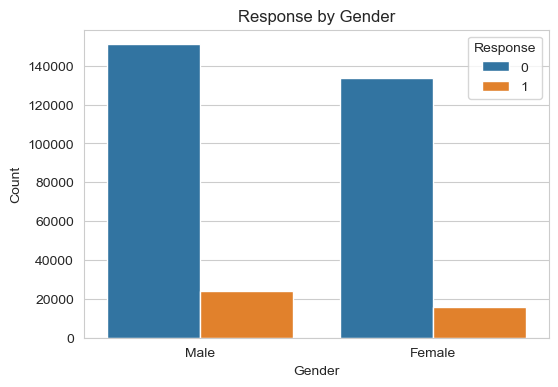

In [46]:
# Visualize the relationship between the 'Gender' column and the target variable 'Response'
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', hue='Response', data=df_train)
plt.title('Response by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Response', loc='upper right')
plt.show()

There is no significant variance on customer gender in terms of willingness to purchase motor vehicle insurance.(Reception low on both)

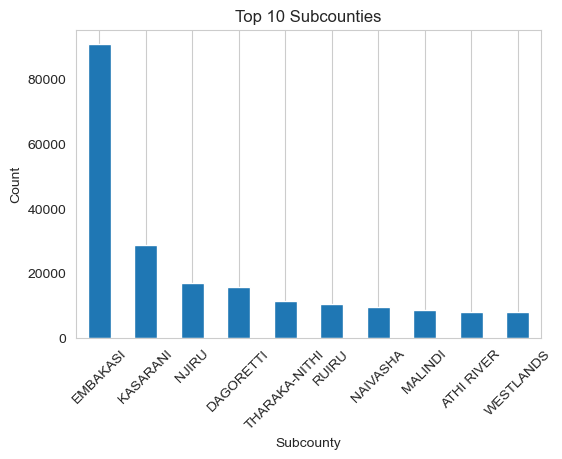

In [47]:
# Get the top 10 customer residence subcounties based on their occurrence count
top_10_subcounties = df_train['Customer_Residence_Sub_County'].value_counts().head(10)

# Plot the top 10 subcounties on a histogram
plt.figure(figsize=(6, 4))
top_10_subcounties.plot(kind='bar')
plt.title('Top 10 Subcounties')
plt.xlabel('Subcounty')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

Embakasi and Kasarani have the highest numbers of life insurance policies compared to the rest of the subcounties, these correlate to population density numbers from KNBS.

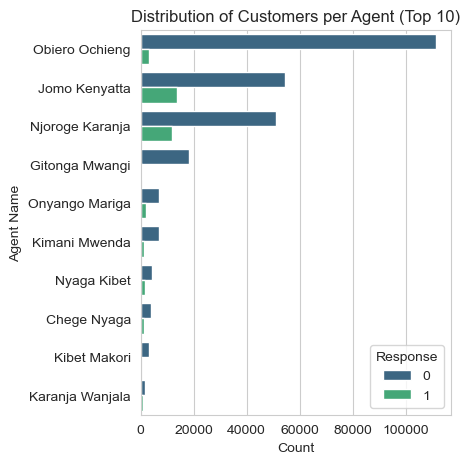

In [48]:
# Get the top ten sales agents by value counts
top_10_counties = df_train['Agent_name'].value_counts().head(10).index

# Filter the DataFrame to include only the top 10 employees
training_set_values_top_10 = df_train[df_train['Agent_name'].isin(top_10_counties)]

# Plot the countplot for the top 10 employees
plt.figure(figsize=(4, 5))
sns.countplot(data=training_set_values_top_10, y='Agent_name',hue='Response', palette='viridis', order=top_10_counties)
plt.title('Distribution of Customers per Agent (Top 10)')
plt.ylabel('Agent Name')
plt.xlabel('Count')
plt.xticks(rotation=0)
plt.show()

Obiero Ochieng, Jomo Kenyatta and Njoroge Karanja are the top Sales Agents with Jomo and Njoroge leading in cross sale conversions. Further analysis will be required to establish the differantiator in their performance(Skills, Experience, Region, Education)

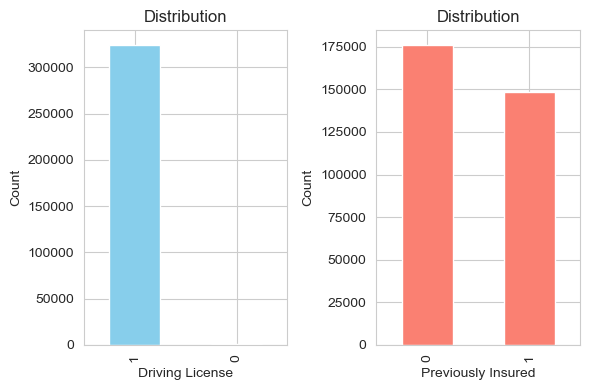

In [49]:
# plot distribution of the 'Driving_License' and 'Previously_Insured' columns

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 4))

# Plot the distribution of 'Driving_License' column
df_train['Driving_License'].value_counts().plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Distribution')
axes[0].set_xlabel('Driving License')
axes[0].set_ylabel('Count')

# Plot the distribution of 'Previously_Insured' column
df_train['Previously_Insured'].value_counts().plot(kind='bar', ax=axes[1], color='salmon')
axes[1].set_title('Distribution')
axes[1].set_xlabel('Previously Insured')
axes[1].set_ylabel('Count')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

Majority of life insurance customers have driving licenses(99.8%) and more customers are new to insurance compared to those having renewals

## 4.0 Feature engineering

In [38]:
# Hot-encode Gender column
df_train['Gender'] = df_train['Gender'].map({'Male': 0, 'Female': 1})

# Hot-encode vehicle_damage' column
df_train['Vehicle_Damage'].replace({'Yes': 1, 'No': 0}, inplace=True)

# Convert the 'Customer_Date_of_Birth' column to datetime
df_train['Customer_Date_of_Birth'] = pd.to_datetime(df_train['Customer_Date_of_Birth'])

# Calculate the current date
current_date = pd.Timestamp.now()

# Calculate customer age
df_train['Customer_Age'] = (current_date - df_train['Customer_Date_of_Birth']).dt.days // 365

# Convert 'Life_policy_start_date' to datetime
df_train['Life_policy_start_date'] = pd.to_datetime(df_train['Life_policy_start_date'])

# Extract day of the week and month into new columns
df_train['day_of_week'] = df_train['Life_policy_start_date'].dt.day_name()
df_train['month'] = df_train['Life_policy_start_date'].dt.month_name()

# Calculate the current year
current_year = pd.Timestamp.now().year

# Calculate the vehicle age
df_train['vehicle_age'] = current_year - df_train['Vehicle_Year_of_Manufacture']

# Calculate the length of the current life policy in months
current_date = pd.to_datetime('now')  # Get the current date
df_train['policy_length'] = ((current_date - df_train['Life_policy_start_date']).dt.days) // 30

In [39]:
def label_encode_columns(df):
    label_encoder = LabelEncoder()
    columns_to_encode = ['Customer_Residence_Sub_County', 'Agent_name', 'day_of_week', 'month']
    for col in columns_to_encode:
        df[col] = label_encoder.fit_transform(df[col])
    return df

# Apply label encoding to the specified columns
df_train = label_encode_columns(df_train)

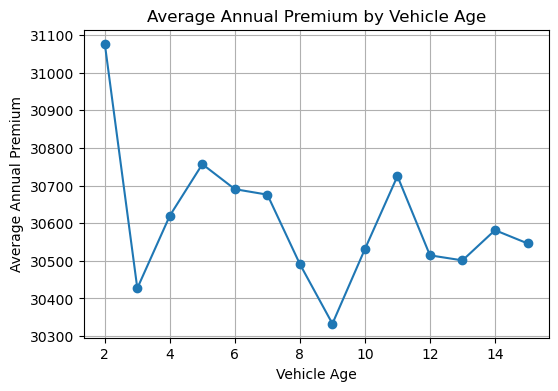

In [40]:
# Group the data by vehicle_age and calculate the mean Annual_Premium for each age
avg_premium_by_age = df_train.groupby('vehicle_age')['Annual_Premium'].mean().reset_index()

# Plot Annual_Premium vs vehicle_age using a line graph
plt.figure(figsize=(6, 4))
plt.plot(avg_premium_by_age['vehicle_age'], avg_premium_by_age['Annual_Premium'], marker='o', linestyle='-')
plt.title('Average Annual Premium by Vehicle Age')
plt.xlabel('Vehicle Age')
plt.ylabel('Average Annual Premium')
plt.grid(True)
plt.show()

The graph highlights an inverse relationship between vehicle age and average annual premiums, indicating that insurance costs tend to decrease as vehicles age. This insight can be valuable for both insurance companies and policyholders in understanding how vehicle age influences insurance premiums and in making informed decisions regarding insurance coverage and vehicle purchases.This decline suggests that as vehicles age, their insurance premiums tend to decrease. This trend can be attributed to several factors, including the depreciation of vehicle value over time, reduced repair costs for older vehicles, and potentially lower risk profiles associated with older vehicles.

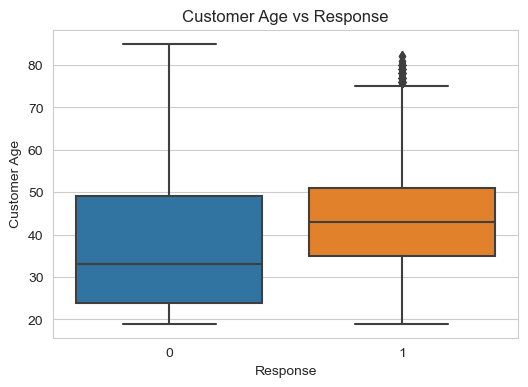

In [53]:
# Plot Customer_Age vs target variable 'Response'

plt.figure(figsize=(6, 4))
sns.boxplot(x='Response', y='Customer_Age', data=df_train)
plt.title('Customer Age vs Response')
plt.xlabel('Response')
plt.ylabel('Customer Age')
plt.show()


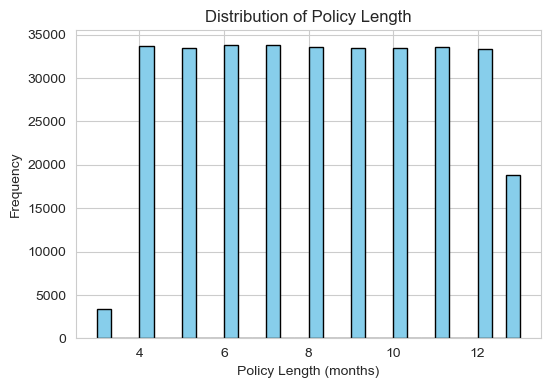

In [54]:
# Plot the 'Policy_Length' column
plt.figure(figsize=(6, 4))
plt.hist(df_train['policy_length'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Policy Length (months)')
plt.ylabel('Frequency')
plt.title('Distribution of Policy Length')
plt.grid(True)
plt.show()


In [41]:
# Drop redundant columns
df_train = df_train.drop(['Customer_Date_of_Birth','Vehicle_Year_of_Manufacture', 'Life_policy_start_date'], axis=1)
df_train.head()


,Gender,Driving_License,Customer_Residence_Sub_County,Previously_Insured,Vehicle_Damage,Annual_Premium,Agent_name,Response,Customer_Age,day_of_week,month,vehicle_age,policy_length
0,0,1,6,0,1,38294,22,1,47,4,2,4,4
1,0,1,52,1,0,28619,124,0,21,6,5,4,10
2,1,1,5,1,0,27496,124,0,29,2,2,13,5
3,1,1,10,0,1,2630,18,0,24,5,4,4,9
4,0,1,52,0,1,23367,124,0,23,2,7,9,12


In [57]:
#New columns after feature engineering (Initial 12, added 5, droppped 4, Final 13)
df_train.nunique()

Gender                               2
Driving_License                      2
Customer_Residence_Sub_County       53
Previously_Insured                   2
Vehicle_Damage                       2
Annual_Premium                   47027
Agent_name                         155
Response                             2
Customer_Age                        67
day_of_week                          7
month                               11
vehicle_age                         14
policy_length                       11
dtype: int64

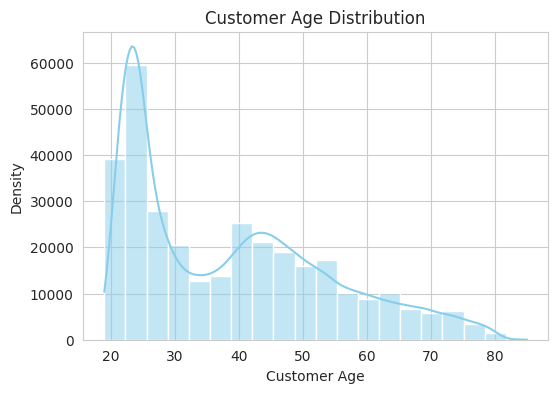

In [ ]:
# Plot customer age distribution
plt.figure(figsize=(6, 4))
sns.histplot(data=df_train, x='Customer_Age', bins=20, kde=True, color='skyblue')
plt.title('Customer Age Distribution')
plt.xlabel('Customer Age')
plt.ylabel('Density')
plt.show()



Majority our life insurance policy holders are between 20 and 30 years. The youngest is 18 while the oldest customer is 84 years. The uptake of life insurance is inversly proportional to the customer age.

### 4.1 Scaling Numerical features

In [42]:
## Make a copy of the original dataframe
df2_train = df_train.copy()

In [43]:
# Define the scaling function

def scale_columns(df, scaler, columns):
    for column in columns:
        df[column] = scaler.fit_transform(df[column].values.reshape(-1,1))
    return df

# Initialize the scaler
scaler = MinMaxScaler()

# Define columns to scale
columns_to_scale = ['Customer_Residence_Sub_County', 'Annual_Premium', 'Agent_name', 'Customer_Age', 'day_of_week', 'month',
                    'vehicle_age','policy_length']

# Make a copy of the original DataFrame
df2_train = df_train.copy()

# Apply scaling function to the specified columns
df2_train = scale_columns(df2_train, scaler, columns_to_scale)

# Now new_df2_train contains the scaled numerical columns
df2_train.head()

,Gender,Driving_License,Customer_Residence_Sub_County,Previously_Insured,Vehicle_Damage,Annual_Premium,Agent_name,Response,Customer_Age,day_of_week,month,vehicle_age,policy_length
0,0,1,0.115385,0,1,0.066347,0.142857,1,0.424242,0.666667,0.2,0.153846,0.000000
1,0,1,1.000000,1,0,0.048348,0.805195,0,0.030303,1.000000,0.5,0.153846,0.666667
2,1,1,0.096154,1,0,0.046259,0.805195,0,0.151515,0.333333,0.2,0.846154,0.111111
3,1,1,0.192308,0,1,0.000000,0.116883,0,0.075758,0.833333,0.4,0.153846,0.555556
4,0,1,1.000000,0,1,0.038578,0.805195,0,0.060606,0.333333,0.7,0.538462,0.888889


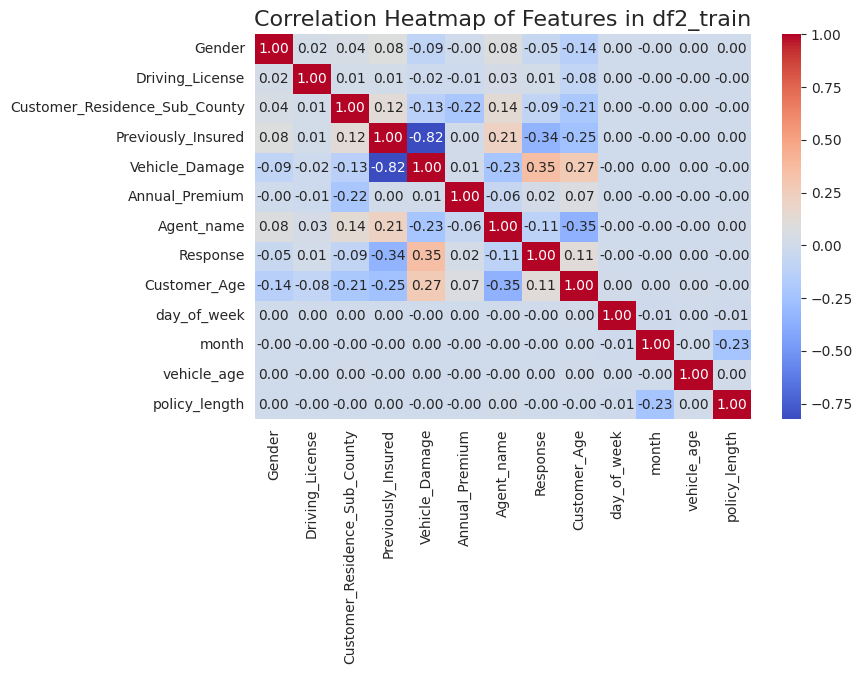

In [ ]:
# Calculate correlation matrix for all features
correlation_matrix = df2_train.corr()

# Create heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Features in df2_train', fontsize=16)
plt.show()


### 4.2 Feature scaling

In [44]:
# create the X and Y variables (predict and target values)
y = df2_train['Response']
X = df2_train.drop(['Response'], axis=1)

#split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (259572, 12)
X_test shape: (64894, 12)
y_train shape: (259572,)
y_test shape: (64894,)


### 4.3 Synthetic Minority Oversampling Techniques (SMOTE)

This is crucial because our imbalanced dataset, one class(those who purchased second policy) is significantly underrepresented, conventional models may struggle to learn patterns effectively, leading to biased or inaccurate predictions. SMOTE helps alleviate this imbalance, improving the model's ability to generalize and make more accurate predictions for the minority class.

In [46]:
# Instantiate SMOTE
smote = SMOTE(sampling_strategy= 0.5, random_state=42)

# Apply SMOTE to balance the dataset
X_train, y_train = smote.fit_resample(X, y)

## 5.0 Modeling

We will harness a number of powerful models for our prediction on Life Insurance Policyholders who will take up a vehicle insurance product. Each model brings its unique strengths to the table, allowing us to explore a diverse range of approaches in solving our classification tasks. By comparing and contrasting their performances, we aim to uncover insights into the most effective strategies for our predictive endeavors.

The models used are:

1. Logistic Regression

2. Naive Bayes

3. Decision Tree

4. Random Forest

5. KNN Model

6. XGBoost

6. Adaboost

### 5.1.1 Logistic Regression

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, log_loss
from sklearn.linear_model import LogisticRegression

# Initialize logistic regression model with increased max_iter for convergence
lr_model = LogisticRegression(max_iter=1000)

# Train the model on training data
lr_model.fit(X_train, y_train)

# Make predictions on testing data
y_pred = lr_model.predict(X_test)  # Predicted class labels

# Make predictions on testing data
y_pred_proba = lr_model.predict_proba(X_test)  # Predicted probabilities for each class

# Evaluate model
precision = precision_score(y_test, y_pred) # Calculate precision
recall = recall_score(y_test, y_pred) # Calculate recall
accuracy = accuracy_score(y_test, y_pred) # Calculate accuracy
conf_matrix = confusion_matrix(y_test, y_pred) # Calculate confusion matrix
f1 = f1_score(y_test, y_pred) # Calculate F1 score
logloss = log_loss(y_test, y_pred_proba)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Log Loss:", logloss)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.6932536135852313
Precision: 0.26001363217192575
Recall: 0.8172652804032766
F1 Score: 0.3945127144421463
Log Loss: 0.3692641497628879
Confusion Matrix:
[[38503 18456]
 [ 1450  6485]]


The model achieves an accuracy of approximately 0.69, meaning that it correctly predicts the class of about 69% of the instances in the dataset. It has reasonably fair accuracy, but its performance varies between the two classes. It performs well in correctly predicting instances of class 0 (negative class) but struggles with class 1 (positive class), as evidenced by the lower precision and F1-score for class 1.

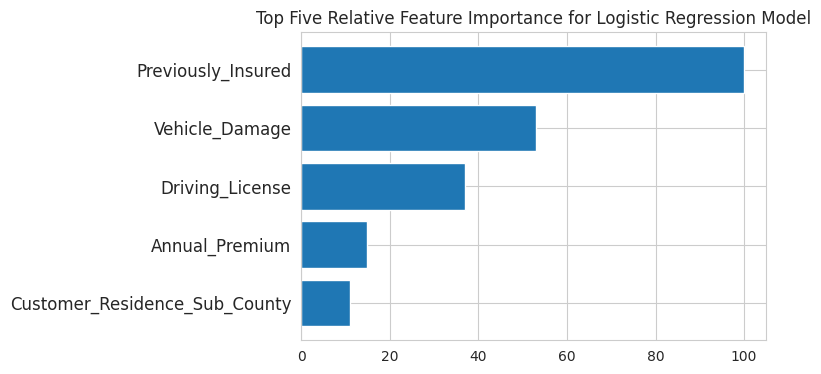

In [ ]:
# Feature Importances
feature_importance = abs(lr_model.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)[-5:]
pos = np.arange(sorted_idx.shape[0]) + .5

# Create the figure and axis for plotting
featfig = plt.figure(figsize=(6, 4))
featax = featfig.add_subplot(1, 1, 1)

# Plot the top five relative feature importances
featax.barh(pos, feature_importance[sorted_idx], align='center')

# Set title and labels
plt.title('Top Five Relative Feature Importance for Logistic Regression Model')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=12)

# Show the plot
plt.show()

### 5.1.2 Naive Bayes

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, log_loss
from sklearn.naive_bayes import GaussianNB

# Initialize the Naive Bayes classifier
nb = GaussianNB()

# Train the Naive Bayes classifier
nb.fit(X_train, y_train)

# Predictions on the test set
y_pred = nb.predict(X_test)

# Make predictions on testing data
y_pred_proba = nb.predict_proba(X_test)  # Predicted probabilities for each class

# Evaluate model
precision = precision_score(y_test, y_pred) # Calculate precision
recall = recall_score(y_test, y_pred) # Calculate recall
accuracy = accuracy_score(y_test, y_pred) # Calculate accuracy
conf_matrix = confusion_matrix(y_test, y_pred) # Calculate confusion matrix
f1 = f1_score(y_test, y_pred) # Calculate F1 score
logloss = log_loss(y_test, y_pred_proba)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Log Loss:", logloss)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.6379172188492003
Precision: 0.24951712593355652
Recall: 0.9768115942028985
F1 Score: 0.39749737172748023
Log Loss: 1.6322170047684348
Confusion Matrix:
[[33646 23313]
 [  184  7751]]


Naive Bayes achieved an accuracy of approximately 63.79%, It exhibits a relatively low precision of around 24.95%, indicating a notable number of false positive predictions. However, it shows a high recall of approximately 97.68%, suggesting effective identification of actual positive instances. The model shows moderate performance in predicting whether customers are interested in vehicle insurance, with higher recall for class 1 (interested customers) compared to class 0 (not interested customers).

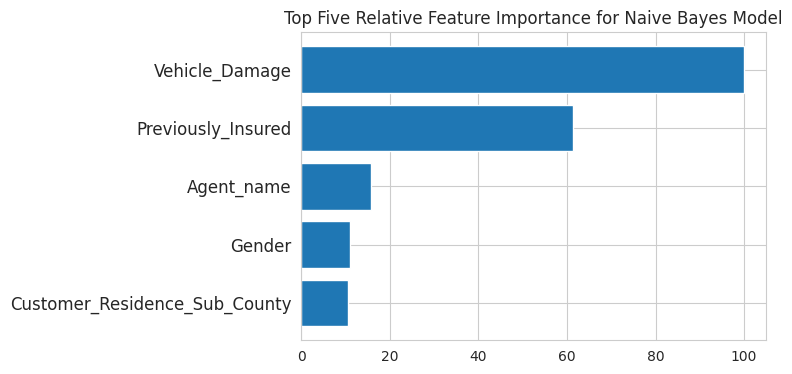

In [ ]:
#Feature importance
import numpy as np
import matplotlib.pyplot as plt

# Get feature log probabilities
feature_log_prob = nb.theta_

# Convert log probabilities to probabilities
feature_prob = np.exp(feature_log_prob)

# Calculate feature importance
feature_importance = feature_prob.max(axis=0) - feature_prob.min(axis=0)
feature_importance = 100.0 * (feature_importance / feature_importance.max())

# Sort features by importance
sorted_idx = np.argsort(feature_importance)[-5:]

# Create positions for plotting
pos = np.arange(sorted_idx.shape[0]) + .5

# Create the figure and axis for plotting
featfig = plt.figure(figsize=(6, 4))
featax = featfig.add_subplot(1, 1, 1)

# Plot the top five relative feature importances
featax.barh(pos, feature_importance[sorted_idx], align='center')

# Set title and labels
plt.title('Top Five Relative Feature Importance for Naive Bayes Model')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train.columns)[sorted_idx], fontsize=12)

# Show the plot
plt.show()


### 5.1.3 Decision Tree

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, log_loss
from sklearn.tree import DecisionTreeClassifier

# Create logistic regression model:
dt = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
dt.fit(X_train, y_train)

# Make predictions on the training and testing sets:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

# Make predictions on testing data
y_pred_proba = dt.predict_proba(X_test)  # Predicted probabilities for each class

# Evaluate model
precision = precision_score(y_test, y_test_pred) # Calculate precision
recall = recall_score(y_test, y_test_pred) # Calculate recall
accuracy = accuracy_score(y_test, y_test_pred) # Calculate accuracy
conf_matrix = confusion_matrix(y_test, y_test_pred) # Calculate confusion matrix
f1 = f1_score(y_test, y_test_pred) # Calculate F1 score
logloss = log_loss(y_test, y_pred_proba)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Log Loss:", logloss)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9999229512743859
Precision: 1.0
Recall: 0.9993698802772527
F1 Score: 0.9996848408446266
Log Loss: 0.0001068122138504925
Confusion Matrix:
[[56959     0]
 [    5  7930]]


The Decision Tree base model demonstrates exceptional performance, with an accuracy of approximately 99.99%. It achieves a perfect precision score of 100%, indicating that all positive predictions made by the model are indeed correct. The recall score is also very high, at approximately 99.94%, implying that the model effectively captures almost all actual positive instances. The F1 score, which balances precision and recall, is nearly 99.97%. Moreover, the log loss is extremely low, at approximately 0.0001, signifying minimal uncertainty in the model's predictions. This might indicate an imbalance in the dataset or potential overfitting of the model to class 0. Further analysis and model tuning may be needed to improve performance, particularly in correctly identifying interested customers (class 1).


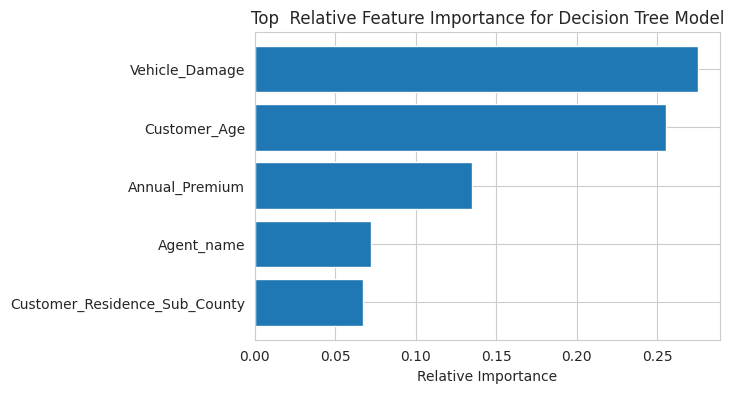

In [ ]:
#Extract feature importance
dt.fit(X_train, y_train)

# Extract feature importance scores
feature_importance = dt.feature_importances_

# Sort feature importance scores in descending order
sorted_idx = np.argsort(feature_importance)[::-1]

# Plot feature importance
plt.figure(figsize=(6, 4))
plt.title('Top  Relative Feature Importance for Decision Tree Model')
plt.barh(range(5), feature_importance[sorted_idx][:5], align='center')
plt.yticks(range(5), X_train.columns[sorted_idx][:5])
plt.gca().invert_yaxis()
plt.xlabel('Relative Importance')
plt.show()

### 5.1.4 Random Forest Classifier

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train classifier on training data
rf_classifier.fit(X_train, y_train)

# Make predictions on testing data
y_pred = rf_classifier.predict(X_test)

y_pred_proba = rf_classifier.predict_proba(X_test)  # Predicted probabilities for each class

# Evaluate model
precision = precision_score(y_test, y_pred) # Calculate precision
recall = recall_score(y_test, y_pred) # Calculate recall
accuracy = accuracy_score(y_test, y_pred) # Calculate accuracy
conf_matrix = confusion_matrix(y_test, y_pred) # Calculate confusion matrix
f1 = f1_score(y_test, y_pred) # Calculate F1 score
logloss = log_loss(y_test, y_pred_proba)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Log Loss:", logloss)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9999075415292631
Precision: 1.0
Recall: 0.9992438563327032
F1 Score: 0.9996217851739787
Log Loss: 0.0738392113944069
Confusion Matrix:
[[56959     0]
 [    6  7929]]


The Random Forest base model demonstrates exceptional performance, with an accuracy of approximately 99.99%. It achieves a perfect precision score of 100%, indicating that all positive predictions made by the model are indeed correct. The recall score is also very high, at approximately 99.94%, implying that the model effectively captures almost all actual positive instances. The F1 score, which balances precision and recall, is nearly 99.97%. Moreover, the log loss is extremely low, at approximately 0.0001, signifying minimal uncertainty in the model's predictions. This might indicate an imbalance in the dataset or potential overfitting of the model to class 0. Further analysis and model tuning may be needed to improve performance, particularly in correctly identifying interested customers (class 1).

<Figure size 600x400 with 0 Axes>

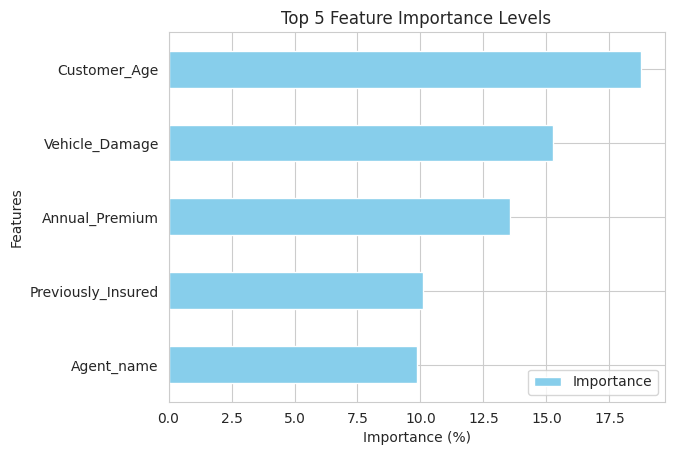

In [ ]:
# Extract feature importance
importance = pd.DataFrame({"Importance": rf_classifier.feature_importances_ * 100}, index=X.columns)

# Sort the DataFrame by importance
importance_sorted = importance.sort_values(by="Importance", ascending=True).tail(5)

# Plotting feature importance
plt.figure(figsize=(6, 4))
importance_sorted.plot(kind='barh', color='skyblue')
plt.title("Top 5 Feature Importance Levels")
plt.xlabel("Importance (%)")
plt.ylabel("Features")
plt.show()

### 5.1.5 KNN Model

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

# Create the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = knn.predict(X_test)

y_pred_proba = knn.predict_proba(X_test)  # Predicted probabilities for each class

# Evaluate model
precision = precision_score(y_test, y_pred) # Calculate precision
recall = recall_score(y_test, y_pred) # Calculate recall
accuracy = accuracy_score(y_test, y_pred) # Calculate accuracy
conf_matrix = confusion_matrix(y_test, y_pred) # Calculate confusion matrix
f1 = f1_score(y_test, y_pred) # Calculate F1 score
logloss = log_loss(y_test, y_pred_proba)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Log Loss:", logloss)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.8723919006379635
Precision: 0.48838458439640126
Recall: 0.9166981726528041
F1 Score: 0.6372596259144072
Log Loss: 0.22353701390584532
Confusion Matrix:
[[49339  7620]
 [  661  7274]]


The KNN model achieved an accuracy of approximately 87.3%. It shows a good performance in terms of recall, meaning it effectively captures most of the positive instances (customers interested in vehicle insurance). While its precision of around 48.84% is moderate, indicating some false positive predictions, the model demonstrates strong recall at approximately 91.67%, suggesting effective identification of actual positive instances. The F1 score, harmonizing precision and recall, stands at approximately 63.73%. The log loss is relatively low, at around 0.224, indicating minimal uncertainty in the model's predictions

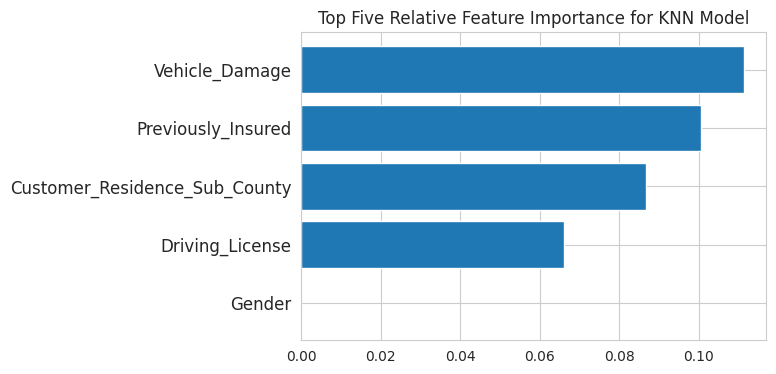

In [ ]:
#Feature importance
from sklearn.neighbors import KNeighborsClassifier

# Get distances to neighbors for each sample
distances, indices = knn.kneighbors(X_train)

# Calculate feature importance based on distances
feature_importance = np.mean(distances, axis=0)

# Sort features by importance
sorted_idx = np.argsort(feature_importance)[-5:]

# Create positions for plotting
pos = np.arange(sorted_idx.shape[0]) + .5
featfig = plt.figure(figsize=(6, 4))
featax = featfig.add_subplot(1, 1, 1)

# Plot the top five relative feature importances
featax.barh(pos, feature_importance[sorted_idx], align='center')
plt.title('Top Five Relative Feature Importance for KNN Model')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train.columns)[sorted_idx], fontsize=12)

# Show the plot
plt.show()


### 5.1.6 XGBoost

In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix, f1_score, log_loss
from xgboost import XGBClassifier

# Initialize and train the XGBoost classifier
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = xgb_clf.predict(X_test)

# Make predictions on testing data
y_pred_proba = xgb_clf.predict_proba(X_test)  # Predicted probabilities for each class

# Evaluate model
precision = precision_score(y_test, y_pred) # Calculate precision
recall = recall_score(y_test, y_pred) # Calculate recall
accuracy = accuracy_score(y_test, y_pred) # Calculate accuracy
conf_matrix = confusion_matrix(y_test, y_pred) # Calculate confusion matrix
f1 = f1_score(y_test, y_pred) # Calculate F1 score
logloss = log_loss(y_test, y_pred_proba)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Log Loss:", logloss)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.8717909205781736
Precision: 0.4366150806717155
Recall: 0.1671077504725898
F1 Score: 0.24170616113744078
Log Loss: 0.26587138405415917
Confusion Matrix:
[[55248  1711]
 [ 6609  1326]]


The XGBoost model displays moderate performance, with an accuracy of approximately 87.18%. Its precision of about 43.66% indicates a significant number of false positive predictions, while the recall score of approximately 16.71% suggests it has difficulty capturing actual positive instances. Consequently, the F1 score, which balances precision and recall, stands at approximately 24.17%. The log loss is relatively low, at around 0.266, indicating reasonable predictive certainty. In the confusion matrix, there is a notable number of true negatives but also a substantial number of false negatives, reflecting the model's tendency to misclassify positive instances


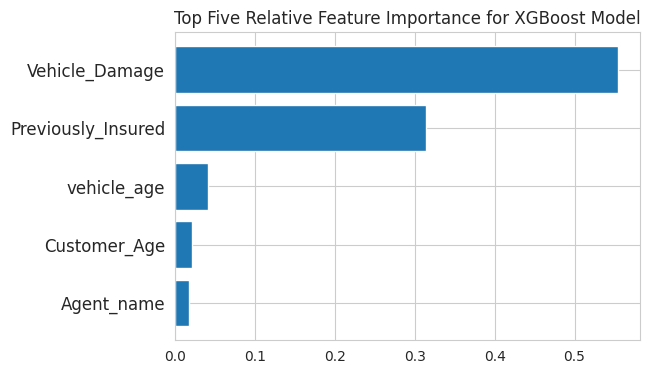

In [ ]:
# Get feature importance
feature_importance = xgb_clf.feature_importances_

# Sort features by importance
sorted_idx = np.argsort(feature_importance)[-5:]

# Create positions for plotting
pos = np.arange(sorted_idx.shape[0]) + .5

# Create the figure and axis for plotting
featfig = plt.figure(figsize=(6, 4))
featax = featfig.add_subplot(1, 1, 1)

# Plot the top five relative feature importances
featax.barh(pos, feature_importance[sorted_idx], align='center')

# Set title and labels
plt.title('Top Five Relative Feature Importance for XGBoost Model')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train.columns)[sorted_idx], fontsize=12)

# Show the plot
plt.show()

### 5.1.7 AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix, f1_score, log_loss

# Initialize the AdaBoost classifier
adaboost_classifier = AdaBoostClassifier()

# Train the classifier
adaboost_classifier.fit(X_train, y_train)

# Make predictions on testing data
y_pred_proba = adaboost_classifier.predict_proba(X_test)  # Predicted probabilities for each class

# Evaluate model
y_pred_class = adaboost_classifier.predict(X_test)  # Predicted class labels

# Evaluate model
precision = precision_score(y_test, y_pred_class) # Calculate precision
recall = recall_score(y_test, y_pred_class) # Calculate recall
accuracy = accuracy_score(y_test, y_pred_class) # Calculate accuracy
conf_matrix = confusion_matrix(y_test, y_pred_class) # Calculate confusion matrix
f1 = f1_score(y_test, y_pred_class) # Calculate F1 score
logloss = log_loss(y_test, y_pred_proba) # Calculate log loss

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Log Loss:", logloss)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.7975467685764478
Precision: 0.3279545003637326
Recall: 0.6249527410207939
F1 Score: 0.4301700208188758
Log Loss: 0.6619149032045384
Confusion Matrix:
[[46797 10162]
 [ 2976  4959]]


The Adaboost model demonstrates moderate performance, with an accuracy of approximately 79.75%. Its precision, standing at around 32.80%, indicates a notable number of false positive predictions, while the recall score of approximately 62.50% suggests it effectively captures a significant proportion of actual positive instances. Consequently, the F1 score, which balances precision and recall, is around 43.02%. The log loss is relatively high, at approximately 0.662, indicating some uncertainty in the model's predictions. In the confusion matrix, there are a considerable number of true negatives but also notable false negatives, indicating the model's tendency to misclassify positive instances.


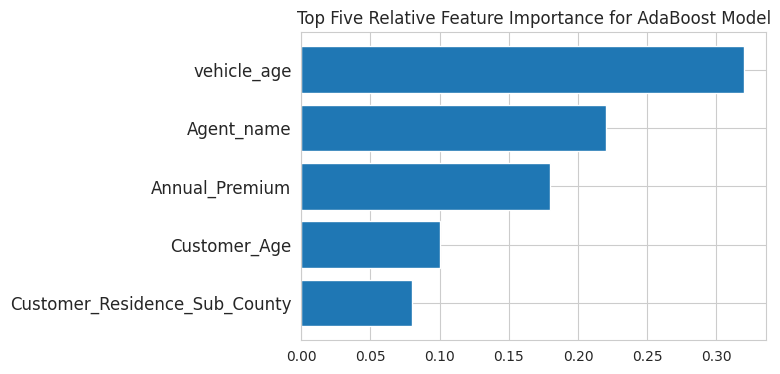

In [ ]:
# Get feature importance
feature_importance = adaboost_classifier.feature_importances_

# Sort features by importance
sorted_idx = np.argsort(feature_importance)[-5:]

# Create positions for plotting
pos = np.arange(sorted_idx.shape[0]) + .5

# Create the figure and axis for plotting
featfig = plt.figure(figsize=(6, 4))
featax = featfig.add_subplot(1, 1, 1)

# Plot the top five relative feature importances
featax.barh(pos, feature_importance[sorted_idx], align='center')

# Set title and labels
plt.title('Top Five Relative Feature Importance for AdaBoost Model')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train.columns)[sorted_idx], fontsize=12)

# Show the plot
plt.show()

## 5.2.0 Model Comparison

### 5.2.1 Receiver Operating Characteristic Curve (ROC Curve)

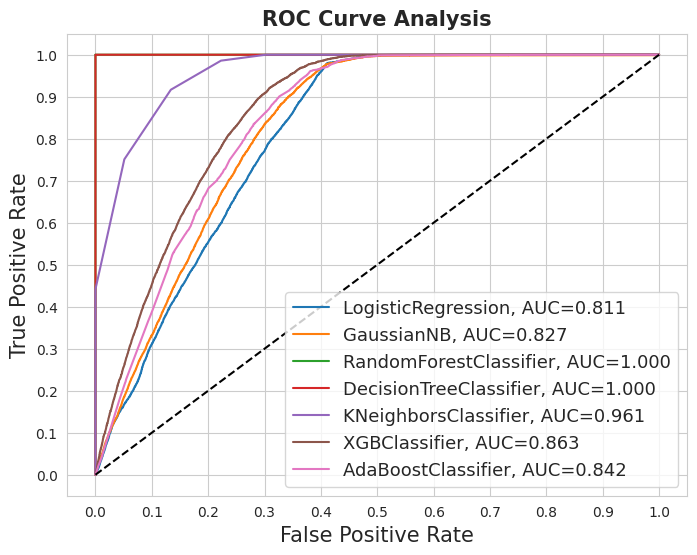

In [ ]:
# Define the classifiers
classifiers = [
    LogisticRegression(),
    GaussianNB(),
    RandomForestClassifier(),
    DecisionTreeClassifier(),
    KNeighborsClassifier(),
    XGBClassifier(),
    AdaBoostClassifier(),
]

# Define a list to store results
results = []

# Train models and record results
for cls in classifiers:
    model = cls.fit(X_train, y_train)
    yproba = model.predict_proba(X_test)[::,1]
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    results.append({'classifiers': cls.__class__.__name__,
                    'fpr': fpr,
                    'tpr': tpr,
                    'auc': auc})

# Convert results to a DataFrame
result_table = pd.DataFrame(results)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

# Plot the ROC curve
fig = plt.figure(figsize=(8,6))
for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], result_table.loc[i]['tpr'],
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))

plt.plot([0,1], [0,1], color='black', linestyle='--')
plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)
plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)
plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')
plt.show()

### 5.2.2 Comparing Model Performance Metrics (Precision Vs Accuracy)

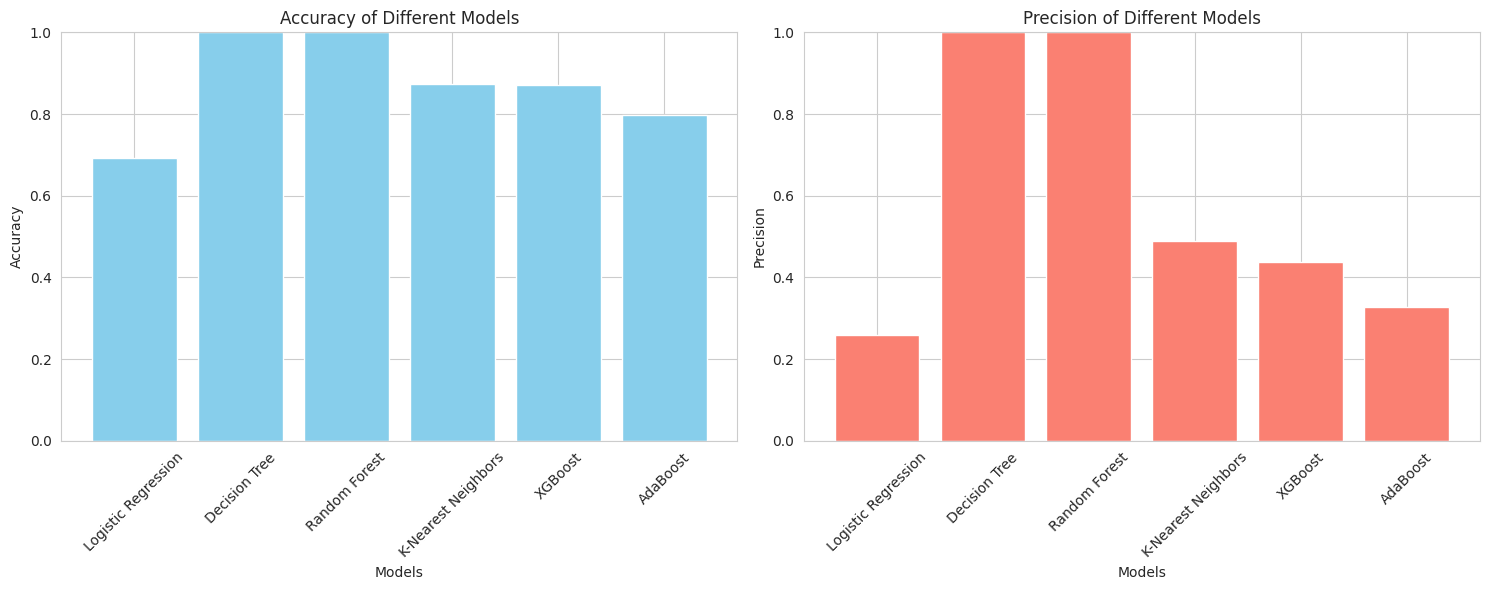

In [ ]:
# Define the pipelines for each model
logistic_pipeline = Pipeline([('logistic_regression', LogisticRegression())])
tree_pipeline = Pipeline([('decision_tree', DecisionTreeClassifier())])
forest_pipeline = Pipeline([('random_forest', RandomForestClassifier())])
knn_pipeline = Pipeline([('knn', KNeighborsClassifier())])
xgboost_pipeline = Pipeline([('xgboost', XGBClassifier())])
adaboost_pipeline = Pipeline([('adaboost', AdaBoostClassifier())])

# List of pipelines and model types
pipelines = [logistic_pipeline, tree_pipeline, forest_pipeline, knn_pipeline, xgboost_pipeline, adaboost_pipeline]
pipeline_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'K-Nearest Neighbors', 'XGBoost', 'AdaBoost']

# Iterate over each pipeline to fit and evaluate the models
accuracies = []
precisions = []
for pipeline in pipelines:
    # Fit the model
    pipeline.fit(X_train, y_train)

    # Calculate accuracy
    accuracy = pipeline.score(X_test, y_test)
    accuracies.append(accuracy)

    # Calculate precision
    y_pred = pipeline.predict(X_test)
    precision = precision_score(y_test, y_pred)
    precisions.append(precision)

# Plotting subplots for accuracy and precision
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plot accuracy
axs[0].bar(pipeline_names, accuracies, color='skyblue')
axs[0].set_title('Accuracy of Different Models')
axs[0].set_xlabel('Models')
axs[0].set_ylabel('Accuracy')
axs[0].set_ylim(0, 1)

# Plot precision
axs[1].bar(pipeline_names, precisions, color='salmon')
axs[1].set_title('Precision of Different Models')
axs[1].set_xlabel('Models')
axs[1].set_ylabel('Precision')
axs[1].set_ylim(0, 1)

# Rotate x-axis labels for better readability
for ax in axs:
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


On comparing the Metrics of the applied models, it was found that Random Forests have better precision and recall as well as a higher F1 score implying a better prediction of both true positives and negatives while minimizing the false positives and negatives. While KNN and XGBoost have similar Accuracy scores, KNN model has better Precision and F1 Scores

## 5.3.0 Cross-validation on train data

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, log_loss
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import numpy as np

# Define your X_train and y_train before executing this code

n_splits = 5
# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(),
    'AdaBoost': AdaBoostClassifier()
}

# Perform cross-validation on each model
# Perform cross-validation on each model
for name, model in models.items():
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []
    cm_sum = np.zeros((2, 2)) # Initialize confusion matrix
    log_loss_scores = []
    kf = KFold(n_splits=n_splits) #Initial Splits
    # Perform cross-validation
    for train_index, test_index in kf.split(X_train):
        X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
        y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

        # Train model
        model.fit(X_train_fold, y_train_fold)

        # Make predictions
        y_pred_fold = model.predict(X_test_fold)

        # Calculate evaluation metrics
        accuracy_scores.append(accuracy_score(y_test_fold, y_pred_fold))
        precision_scores.append(precision_score(y_test_fold, y_pred_fold, labels=model.classes_))
        recall_scores.append(recall_score(y_test_fold, y_pred_fold, labels=model.classes_))
        f1_scores.append(f1_score(y_test_fold, y_pred_fold, labels=model.classes_))

        # Calculate confusion matrix
        cm = confusion_matrix(y_test_fold, y_pred_fold, labels=model.classes_)
        cm_sum += cm

        # Calculate log loss
        y_pred_proba_fold = model.predict_proba(X_test_fold)
        log_loss_scores.append(log_loss(y_test_fold, y_pred_proba_fold, labels=model.classes_))

    # Calculate average confusion matrix
    avg_cm = cm_sum / n_splits

    # Print evaluation metrics
    print(f"{name} Cross-validation results:")
    print("Accuracy:", np.mean(accuracy_scores))
    print("Precision:", np.mean(precision_scores))
    print("Recall:", np.mean(recall_scores))
    print("F1 Score:", np.mean(f1_scores))
    print("Confusion Matrix:\n", avg_cm)
    print("Log Loss:", np.mean(log_loss_scores))
    print()



Logistic Regression Cross-validation results:
Accuracy: 0.5322582156325393
Precision: 0.2550774717083327
Recall: 0.7425136321789981
F1 Score: 0.3685166692347718
Confusion Matrix:
 [[35117.4 21806.6]
 [18132.  10330. ]]
Log Loss: 0.5624889437142413

Decision Tree Cross-validation results:
Accuracy: 0.8376712810062539
Precision: 0.5315838873375471
Recall: 0.5484203537224565
F1 Score: 0.5375894927043623
Confusion Matrix:
 [[50324.   6600. ]
 [ 7260.6 21201.4]]
Log Loss: 5.849366333998993

Random Forest Cross-validation results:
Accuracy: 0.8796196097720937
Precision: 0.6483480721798983
Recall: 0.6118019803748918
F1 Score: 0.6293670410735585
Confusion Matrix:
 [[52865.2  4058.8]
 [ 6220.  22242. ]]
Log Loss: 0.28714521051627606

KNN Cross-validation results:
Accuracy: 0.7725950389993677
Precision: 0.5457660073745497
Recall: 0.8327644213028812
F1 Score: 0.6145001700988351
Confusion Matrix:
 [[44684.4 12239.6]
 [ 7177.6 21284.4]]
Log Loss: 1.5483606706733544

XGBoost Cross-validation results

The cross-validation results provide a comprehensive overview of the performance of various classification algorithms. Random achieves an accuracy of around 87.96%, demonstrating a higher precision (approximately 64.83%) and reasonable recall (about 61.18%). XGBoost exhibits an accuracy of approximately 85.79%, with a moderate precision (around 61.26%) and relatively low recall (about 42.22%). Overall, the random forest model stands out with the highest accuracy and a balance between precision and recall, followed closely by XGBoost. We will fine tune our two best models with both Grid search and Random Search.

## 5.4.0 Model Hyperparameter Tuning

### 5.4.1 Grid Search

#### 5.4.1.1 Grid Search XGBoost

In [14]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Create model instances
models = {
        'XGBClassifier': XGBClassifier()
}

# Define hyperparameters grid for each model
param_grids = {
      'XGBClassifier': {
        'model__learning_rate': [0.01, 0.1, 0.3],
        'model__n_estimators': [50, 100],
        'model__max_depth': [3, 5],
        'model__min_child_weight': [1, 3],
        'model__gamma': [0, 0.1],
        'model__subsample': [0.6, 0.8],
        'model__colsample_bytree': [0.6, 0.8],
        'model__reg_alpha': [0, 0.1],
        'model__reg_lambda': [0, 0.1]
    }
}

# Perform hyperparameter tuning for each model
best_models = {}
for name, model in models.items():
    print(f"Performing GridSearchCV for {name}...")
    pipe = Pipeline([('model', model)])
    grid_search = GridSearchCV(pipe, param_grids[name], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best accuracy: {grid_search.best_score_}")
    print()


Performing GridSearchCV for XGBClassifier...
Best parameters: {'model__colsample_bytree': 0.6, 'model__gamma': 0.1, 'model__learning_rate': 0.3, 'model__max_depth': 5, 'model__min_child_weight': 3, 'model__n_estimators': 100, 'model__reg_alpha': 0, 'model__reg_lambda': 0, 'model__subsample': 0.8}
Best accuracy: 0.8703464268147003



#### 5.4.1.2 Grid Search Random Forest

In [13]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Create model instances
models = {
    'RandomForestClassifier': RandomForestClassifier()  
}

# Define hyperparameters grid for each model
param_grids = {
    'RandomForestClassifier': {
        'model__n_estimators': [50, 100],
        'model__max_depth': [None, 10, 20],
        'model__min_samples_split': [2, 5],
        'model__min_samples_leaf': [1, 2],
        'model__max_features': ['auto', 'sqrt'],
        'model__bootstrap': [True]
    }

}

# Perform hyperparameter tuning for each model
best_models = {}
for name, model in models.items():
    print(f"Performing GridSearchCV for {name}...")
    pipe = Pipeline([('model', model)])
    grid_search = GridSearchCV(pipe, param_grids[name], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best accuracy: {grid_search.best_score_}")
    print()


Performing GridSearchCV for RandomForestClassifier...
Best parameters: {'model__bootstrap': True, 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 100}
Best accuracy: 0.8901646639964398



### 5.4.2 Random Search

#### 5.4.2.1 Random Search XGBoost and Random Forest

In [15]:
# Define a fucntion to run the various models
def random_search_for_model(model_name, param_grid, X, y, n_iter=10, cv=5, scoring='accuracy', random_state=None, error_score='raise'):
    if model_name == 'Random Forest':
        model = RandomForestClassifier()
    elif model_name == 'XGBoost':
        model = XGBClassifier()
    else:
        raise ValueError("Invalid model name")

    random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=n_iter, cv=cv, scoring=scoring, random_state=random_state)
    random_search.fit(X, y)

    return random_search.best_estimator_, random_search.best_params_, random_search.best_score_

# Define parameter grids for each model
param_grids = {
    'Random Forest': {'n_estimators': [50, 100, 150], 'max_depth': [None, 10, 20]},
    'XGBoost': {'n_estimators': [50, 100, 150], 'max_depth': [3, 5, 10]},
}


# Perform random search for each model
for model_name, param_grid in param_grids.items():
    best_estimator, best_params, best_score = random_search_for_model(model_name, param_grid, X_train, y_train)
    print(f"Best parameters for {model_name}: {best_params}")
    print(f"Best score for {model_name}: {best_score}")
    print("-------------")


Best parameters for Random Forest: {'n_estimators': 150, 'max_depth': None}
Best score for Random Forest: 0.8908978052608155
-------------
Best parameters for XGBoost: {'n_estimators': 100, 'max_depth': 10}
Best score for XGBoost: 0.8747616705314689
-------------


## 5.5.0 Tuned Models

### 5.5.1 Grid Search Tuned Random Forest

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, log_loss
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Initialize RandomForestClassifier
# Initialize RandomForestClassifier
gst_rf_classifier = RandomForestClassifier(bootstrap = True, max_depth = None, max_features = 'sqrt', 
                                           min_samples_leaf = 1, min_samples_split = 2, n_estimators = 100,
                                           random_state = 42)


# Perform cross-validation
cv_scores = cross_val_score(gst_rf_classifier, X_train, y_train, cv=5, scoring='accuracy')

# Train classifier on entire training data
gst_rf_classifier.fit(X_train, y_train)

# Make predictions on testing data
y_pred = gst_rf_classifier.predict(X_test)
y_pred_proba = gst_rf_classifier.predict_proba(X_test)  # Predicted probabilities for each class

# Evaluate model
accuracy = accuracy_score(y_test, y_pred) # Calculate accuracy
precision = precision_score(y_test, y_pred) # Calculate precision
recall = recall_score(y_test, y_pred) # Calculate recall
f1 = f1_score(y_test, y_pred) # Calculate F1 score
conf_matrix = confusion_matrix(y_test, y_pred) # Calculate confusion matrix
logloss = log_loss(y_test, y_pred_proba)

print("Cross-Validation Mean Accuracy:", cv_scores.mean())
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Log Loss:", logloss)
print("Confusion Matrix:")
print(conf_matrix)


Cross-Validation Mean Accuracy: 0.8908275361300447
Accuracy: 0.9999075415292631
Precision: 0.9998739124952717
Recall: 0.9993698802772527
F1 Score: 0.9996218328501197
Log Loss: 0.07373018964411823
Confusion Matrix:
[[56958     1]
 [    5  7930]]


The Random Forest Model after Grid search tuning improved Cross-Validation Mean Accuracy to 88.9% from 87.9% 

#### Feature importance for Grid search Tuned Random Forest

<Figure size 600x400 with 0 Axes>

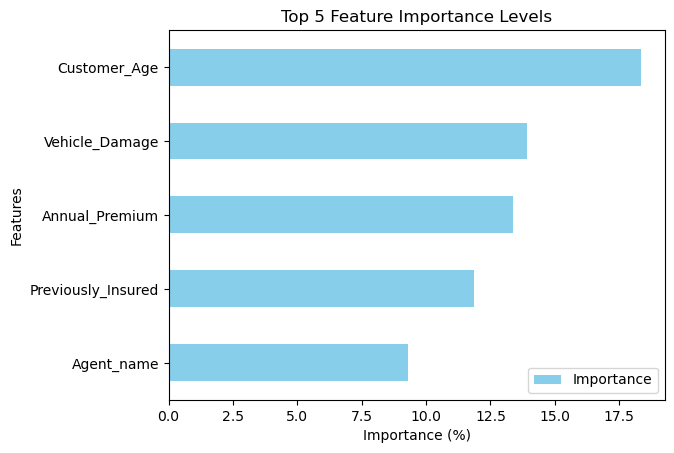

In [16]:
# Extract feature importance
importance = pd.DataFrame({"Importance": gst_rf_classifier.feature_importances_ * 100}, index=X.columns)

# Sort the DataFrame by importance
importance_sorted = importance.sort_values(by="Importance", ascending=True).tail(5)

# Plotting feature importance
plt.figure(figsize=(6, 4))
importance_sorted.plot(kind='barh', color='skyblue')
plt.title("Top 5 Feature Importance Levels")
plt.xlabel("Importance (%)")
plt.ylabel("Features")
plt.show()

### 5.5.2 Random Search Tuned Random Forest

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, log_loss
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Initialize RandomForestClassifier
rst_rf_classifier = RandomForestClassifier(n_estimators = 150, max_depth = None,  random_state = 42)
    
# Perform cross-validation
cv_scores = cross_val_score(rst_rf_classifier, X_train, y_train, cv=5, scoring='accuracy')

# Train classifier on entire training data
rst_rf_classifier.fit(X_train, y_train)

# Make predictions on testing data
y_pred = rst_rf_classifier.predict(X_test)
y_pred_proba = rst_rf_classifier.predict_proba(X_test)  # Predicted probabilities for each class

# Evaluate model
accuracy = accuracy_score(y_test, y_pred) # Calculate accuracy
precision = precision_score(y_test, y_pred) # Calculate precision
recall = recall_score(y_test, y_pred) # Calculate recall
f1 = f1_score(y_test, y_pred) # Calculate F1 score
conf_matrix = confusion_matrix(y_test, y_pred) # Calculate confusion matrix
logloss = log_loss(y_test, y_pred_proba)

print("Cross-Validation Mean Accuracy:", cv_scores.mean())
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Log Loss:", logloss)
print("Confusion Matrix:")
print(conf_matrix)


Cross-Validation Mean Accuracy: 0.8912374393928747
Accuracy: 0.9999383610195087
Precision: 1.0
Recall: 0.9994959042218021
F1 Score: 0.9997478885667465
Log Loss: 0.0736511205338355
Confusion Matrix:
[[56959     0]
 [    4  7931]]


The Random Forest Model after Random search tuning improved Cross-Validation Mean Accuracy to 89.0% from 87.9% 

#### Feature importance for random search Tuned Random Forest

<Figure size 600x400 with 0 Axes>

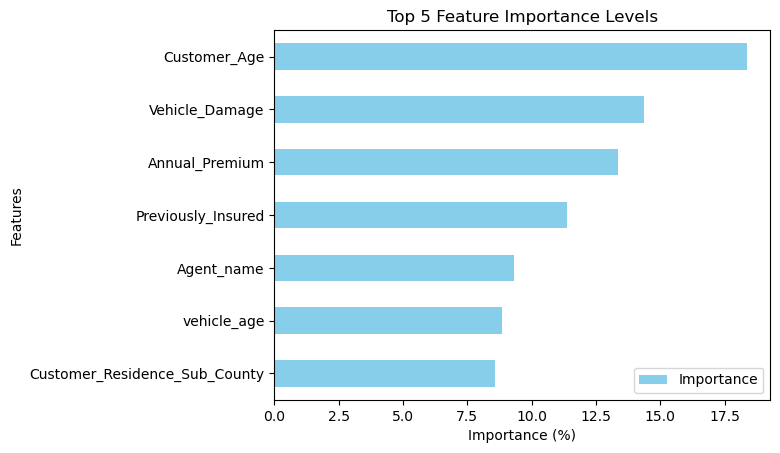

In [23]:
# Extract feature importance
importance = pd.DataFrame({"Importance": rst_rf_classifier.feature_importances_ * 100}, index=X.columns)

# Sort the DataFrame by importance
importance_sorted = importance.sort_values(by="Importance", ascending=True).tail(7)

# Plotting feature importance
plt.figure(figsize=(6, 4))
importance_sorted.plot(kind='barh', color='skyblue')
plt.title("Top 5 Feature Importance Levels")
plt.xlabel("Importance (%)")
plt.ylabel("Features")
plt.show()

### 5.5.3 Grid Search Tuned XGBoost Model

In [22]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix, f1_score, log_loss
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

# Initialize XGBoost classifier
# Initialize XGBoost classifier
gst_xgb_clf = XGBClassifier(colsample_bytree = 0.6, gamma = 0.1, learning_rate = 0.3, max_depth = 5,
                            min_child_weight = 3, n_estimators = 100, reg_alpha = 0, reg_lambda = 0,
                            subsample = 0.8, random_state = 42)


# Perform cross-validation
cv_scores = cross_val_score(gst_xgb_clf, X_train, y_train, cv=5, scoring='accuracy')

# Train classifier on entire training data
gst_xgb_clf.fit(X_train, y_train)

# Make predictions on testing data
y_pred = gst_xgb_clf.predict(X_test)
y_pred_proba = gst_xgb_clf.predict_proba(X_test)  # Predicted probabilities for each class

# Evaluate model
precision = precision_score(y_test, y_pred) # Calculate precision
recall = recall_score(y_test, y_pred) # Calculate recall
accuracy = accuracy_score(y_test, y_pred) # Calculate accuracy
conf_matrix = confusion_matrix(y_test, y_pred) # Calculate confusion matrix
f1 = f1_score(y_test, y_pred) # Calculate F1 score
logloss = log_loss(y_test, y_pred_proba)

print("Cross-Validation Mean Accuracy:", cv_scores.mean())
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Log Loss:", logloss)
print("Confusion Matrix:")
print(conf_matrix)


Cross-Validation Mean Accuracy: 0.8700700349003349
Accuracy: 0.8671371775510833
Precision: 0.40375455309610536
Recall: 0.1816005040957782
F1 Score: 0.2505215577190542
Log Loss: 0.27213801046562214
Confusion Matrix:
[[54831  2128]
 [ 6494  1441]]


The XGBoost Model after Grid search tuning improved Cross-Validation Mean Accuracy to 87.0% from 85.7% 

#### Feature importance for grid search Tuned XGBoost

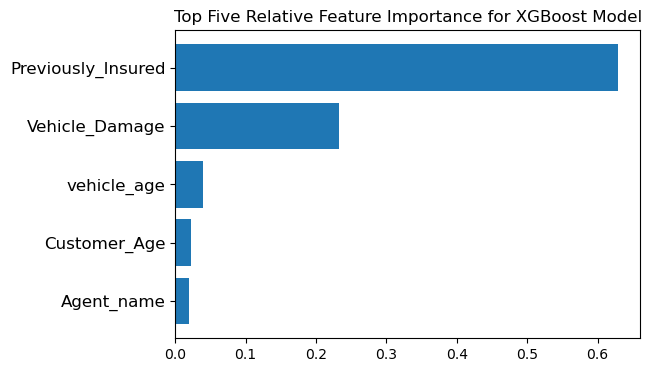

In [23]:
# Get feature importance
feature_importance = gst_xgb_clf.feature_importances_

# Sort features by importance
sorted_idx = np.argsort(feature_importance)[-5:]

# Create positions for plotting
pos = np.arange(sorted_idx.shape[0]) + .5

# Create the figure and axis for plotting
featfig = plt.figure(figsize=(6, 4))
featax = featfig.add_subplot(1, 1, 1)

# Plot the top five relative feature importances
featax.barh(pos, feature_importance[sorted_idx], align='center')

# Set title and labels
plt.title('Top Five Relative Feature Importance for XGBoost Model')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train.columns)[sorted_idx], fontsize=12)

# Show the plot
plt.show()

### 5.5.4 Random Search Tuned XGBoost Model

In [24]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix, f1_score, log_loss
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

# Initialize XGBoost classifier
rst_xgb_clf = XGBClassifier(n_estimators = 100, max_depth = 10)

# Perform cross-validation
cv_scores = cross_val_score(rst_xgb_clf, X_train, y_train, cv=5, scoring='accuracy')

# Train classifier on entire training data
rst_xgb_clf.fit(X_train, y_train)

# Make predictions on testing data
y_pred = rst_xgb_clf.predict(X_test)
y_pred_proba = rst_xgb_clf.predict_proba(X_test)  # Predicted probabilities for each class

# Evaluate model
precision = precision_score(y_test, y_pred) # Calculate precision
recall = recall_score(y_test, y_pred) # Calculate recall
accuracy = accuracy_score(y_test, y_pred) # Calculate accuracy
conf_matrix = confusion_matrix(y_test, y_pred) # Calculate confusion matrix
f1 = f1_score(y_test, y_pred) # Calculate F1 score
logloss = log_loss(y_test, y_pred_proba)

print("Cross-Validation Mean Accuracy:", cv_scores.mean())
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Log Loss:", logloss)
print("Confusion Matrix:")
print(conf_matrix)


Cross-Validation Mean Accuracy: 0.8747616705314689
Accuracy: 0.9004376367614879
Precision: 0.7116599655370477
Recall: 0.3122873345935728
F1 Score: 0.43408951563458
Log Loss: 0.21976177820314283
Confusion Matrix:
[[55955  1004]
 [ 5457  2478]]


The XGBoost Model after Random search tuning improved Cross-Validation Mean Accuracy to 87.4% from 85.7% 

#### Feature importance for random search Tuned XGBoost

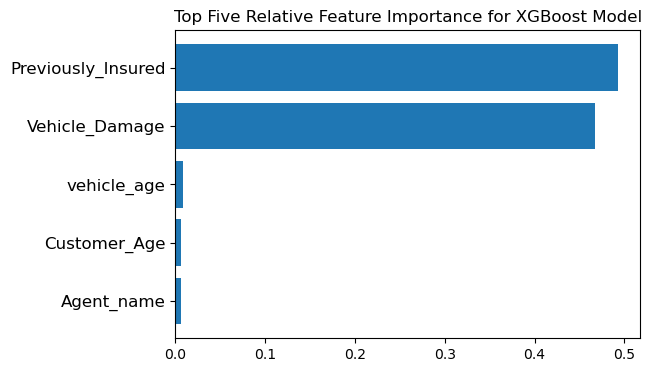

In [25]:
# Get feature importance
feature_importance = rst_xgb_clf.feature_importances_

# Sort features by importance
sorted_idx = np.argsort(feature_importance)[-5:]

# Create positions for plotting
pos = np.arange(sorted_idx.shape[0]) + .5

# Create the figure and axis for plotting
featfig = plt.figure(figsize=(6, 4))
featax = featfig.add_subplot(1, 1, 1)

# Plot the top five relative feature importances
featax.barh(pos, feature_importance[sorted_idx], align='center')

# Set title and labels
plt.title('Top Five Relative Feature Importance for XGBoost Model')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train.columns)[sorted_idx], fontsize=12)

# Show the plot
plt.show()

## 6.0 Pickle

Random Forest tuned with random search is our best model, with a cross-validation mean accuracy of approximately 89.04%, the model consistently demonstrates high accuracy across different folds of the dataset, indicating its robustness and reliability. The model's accuracy further increases to nearly perfect levels, reaching approximately 99.99% in the test dataset, which is an exceptional achievement. Moreover, the precision of 100% indicates that all positive predictions made by the model are indeed correct, offering a high level of confidence in its classifications. The recall score of around 99.95% suggests the model effectively captures almost all actual positive instances, minimizing the chances of false negatives. Additionally, the F1 score, which balances precision and recall, stands at nearly 99.97%, highlighting the model's ability to achieve a harmonious trade-off between these two metrics. The low log loss of about 0.074 reflects minimal uncertainty in the model's predictions, further affirming its reliability.

In [47]:
# Drop unimportant columns on thr final data
X_train = X_train.drop(['Gender','Driving_License','day_of_week','month','policy_length'], axis=1)
X_test = X_test.drop(['Gender','Driving_License','day_of_week','month','policy_length'], axis=1)

In [48]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426930 entries, 0 to 426929
Data columns (total 7 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Customer_Residence_Sub_County  426930 non-null  float64
 1   Previously_Insured             426930 non-null  int64  
 2   Vehicle_Damage                 426930 non-null  int64  
 3   Annual_Premium                 426930 non-null  float64
 4   Agent_name                     426930 non-null  float64
 5   Customer_Age                   426930 non-null  float64
 6   vehicle_age                    426930 non-null  float64
dtypes: float64(5), int64(2)
memory usage: 22.8 MB


In [49]:
X_train.head()

,Customer_Residence_Sub_County,Previously_Insured,Vehicle_Damage,Annual_Premium,Agent_name,Customer_Age,vehicle_age
0,0.115385,0,1,0.066347,0.142857,0.424242,0.153846
1,1.000000,1,0,0.048348,0.805195,0.030303,0.153846
2,0.096154,1,0,0.046259,0.805195,0.151515,0.846154
3,0.192308,0,1,0.000000,0.116883,0.075758,0.153846
4,1.000000,0,1,0.038578,0.805195,0.060606,0.538462


In [50]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64894 entries, 21085 to 315317
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer_Residence_Sub_County  64894 non-null  float64
 1   Previously_Insured             64894 non-null  int64  
 2   Vehicle_Damage                 64894 non-null  int64  
 3   Annual_Premium                 64894 non-null  float64
 4   Agent_name                     64894 non-null  float64
 5   Customer_Age                   64894 non-null  float64
 6   vehicle_age                    64894 non-null  float64
dtypes: float64(5), int64(2)
memory usage: 4.0 MB


In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, log_loss
from sklearn.ensemble import RandomForestClassifier

# Initialize Final RandomForestClassifier
frf_classifier = RandomForestClassifier(n_estimators=150, max_depth=None, random_state=42)
    
# Train classifier on entire training data
frf_classifier.fit(X_train, y_train)

# Make predictions on testing data
y_pred = frf_classifier.predict(X_test)
y_pred_proba = frf_classifier.predict_proba(X_test)  # Predicted probabilities for each class

# Evaluate model
accuracy = accuracy_score(y_test, y_pred) # Calculate accuracy
precision = precision_score(y_test, y_pred) # Calculate precision
recall = recall_score(y_test, y_pred) # Calculate recall
f1 = f1_score(y_test, y_pred) # Calculate F1 score
conf_matrix = confusion_matrix(y_test, y_pred) # Calculate confusion matrix
logloss = log_loss(y_test, y_pred_proba)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Log Loss:", logloss)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.9944679015009091
Precision: 0.9881443298969073
Recall: 0.966351606805293
F1 Score: 0.9771264733991717
Log Loss: 0.08103185401897088
Confusion Matrix:
[[56867    92]
 [  267  7668]]


In [51]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix, f1_score, log_loss
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

# Initialize XGBoost classifier
fxgb_clf = XGBClassifier(n_estimators = 100, max_depth = 10)

# Perform cross-validation
cv_scores = cross_val_score(fxgb_clf, X_train, y_train, cv=5, scoring='accuracy')

# Train classifier on entire training data
fxgb_clf.fit(X_train, y_train)

# Make predictions on testing data
y_pred = fxgb_clf.predict(X_test)
y_pred_proba = fxgb_clf.predict_proba(X_test)  # Predicted probabilities for each class

# Evaluate model
accuracy = accuracy_score(y_test, y_pred) # Calculate accuracy
precision = precision_score(y_test, y_pred) # Calculate precision
recall = recall_score(y_test, y_pred) # Calculate recall
f1 = f1_score(y_test, y_pred) # Calculate F1 score
conf_matrix = confusion_matrix(y_test, y_pred) # Calculate confusion matrix
logloss = log_loss(y_test, y_pred_proba)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Log Loss:", logloss)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.8892193423120781
Precision: 0.6088098016336057
Recall: 0.2630119722747322
F1 Score: 0.36733257062395497
Log Loss: 0.23680288660402854
Confusion Matrix:
[[55618  1341]
 [ 5848  2087]]


In [52]:
import pickle

# Save the trained RandomForestClassifier model to a file
with open('modelx.pkl', 'wb') as file:
    pickle.dump(fxgb_clf, file)


# 7.0 Findings

Based on our analysis;

 - We’ve 12% chance of converting a customer with a DL compared to 5% without DL

 - Males are 4% likely to buy policy compared to females

 - 23% of policy holders previously insured are likely to buy motor vehicle policy

 - Gen X(1965-1980) and Millennials(1981-1996) are more likely to buy motor vehicle policy

 - Customers with history of accidents/repairs 23% likely to buy motor vehicle policy.






# 8.0 Recommendations

 - Target previously insured customers through policy upgrades & renewal incentives.
 - Customize marketing messages for customers who have experienced previous vehicle damage, emphasize on comprehensive coverage.
 - Consider age-specific needs.
 - Provide customized insurance options based on the age of the vehicle to ensure all customers receive comprehensive protection.
 - Utilize sales agents for personalized recommendations.


# 9.0 Conclusion

Random Forest has the highest prediction accuracy and we recommend ICEA Lion Group to  use the model for prediction.

The company needs to focus on the history of vehicle damage and the customers' vehicle insurance background to refine its marketing and communication strategies. 



# 10.0 Next Steps

The future direction of this study involves expanding its scope beyond a single company to conduct comparative analyses of customer interests in vehicle insurance across multiple companies.

Further analysis on Sales Agents to establish the differantiator in their performance on the top three and the rest(Skills, Experience, Region, Education)